# Business understanding

What are the credit card fraud in America?

For this project, I was interested in using Kaggle data from 2018 to better understand:
- What are the predictions for fraud as a permanent row model?
- What are the descriptive statistics of the model?
- Is the overall fraud correlated to each month fraud and how much?


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

Data understanding
First we provide a general view to our data, for example what are the monthly and overall fraud.
Also we have a quick look over the all pattern in a graph.


In [2]:
df = pd.read_csv('C:/Users/96132/Desktop/creditcard.csv')
df.shape

(284807, 31)

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Text(0.5, 1.0, 'credit card fraud dispersion')

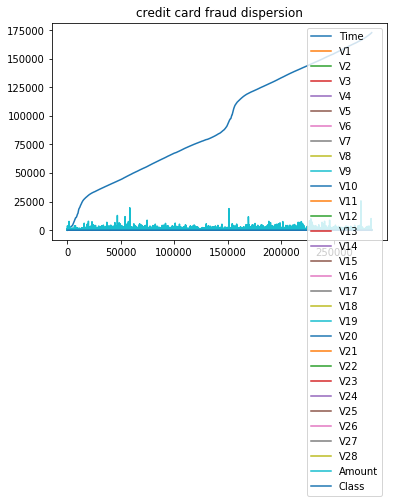

In [17]:
def graph(df):
    '''in this graph we will show the dispersion of the credit card fraud'''
    graph1 = df.plot()
    graph1 = plt.title('credit card fraud dispersion')
    
    return graph1

graph(df)

Modeling

supervised linear regression model

In [5]:
#Split into explanatory and response variables
X = df[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12']]
y = df['Amount']

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit
        
#Predict and score the model
y_test_preds = lm_model.predict(X_test) 
"The r-squared score for your model was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

'The r-squared score for your model was 0.7450167112750643 on 85443 values.'

Results Evaluation

prediction of the model

In [6]:
y_preds = lm_model.predict(X_train)
y_preds

array([  93.80145206,  746.57926544,  107.96373536, ...,   15.21571723,
       -108.6769952 ,   95.9444014 ])

predictions

In [7]:
preds = pd.Series(y_preds)

Text(0.5, 1.0, 'credit card fraud prediction')

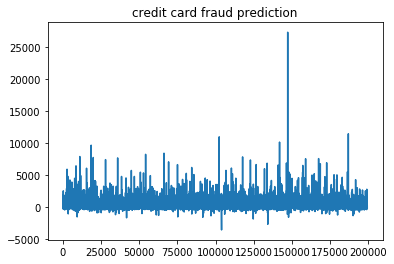

In [8]:
preds.plot()
plt.title('credit card fraud prediction')

Statistics of the model

In [9]:
df1 = df[['V1', 'V2', 'V3', 'V4', 'Amount']]
df1.describe()

,V1,V2,V3,V4,Amount
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,88.349619
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,250.120109
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,0.000000
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,5.600000
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,22.000000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,77.165000
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,25691.160000


Correlation of the model

In [10]:
corr = df1.corr(method='pearson')
corr

,V1,V2,V3,V4,Amount
V1,1.000000e+00,4.697350e-17,-1.424390e-15,1.755316e-17,-0.227709
V2,4.697350e-17,1.000000e+00,2.512175e-16,-1.126388e-16,-0.531409
V3,-1.424390e-15,2.512175e-16,1.000000e+00,-3.416910e-16,-0.210880
V4,1.755316e-17,-1.126388e-16,-3.416910e-16,1.000000e+00,0.098732
Amount,-2.277087e-01,-5.314089e-01,-2.108805e-01,9.873167e-02,1.000000


Graph of the fraudulent

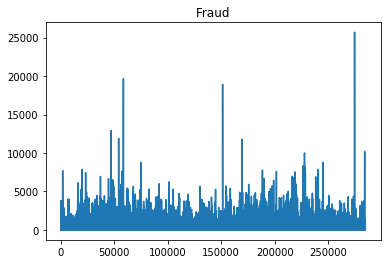

In [12]:
def graph1(df):
    
    amount = df['Amount']
    graph = amount.plot(title='Fraud')
    return graph

graph1(df)